<a href="https://colab.research.google.com/github/MitzonRaj/language-detection/blob/main/Language_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Language Detection.csv to Language Detection (1).csv


Reading the head of dataset

In [ ]:
import pandas as pd

df = pd.read_csv('Language Detection.csv')

print(df.head(630))

                                                  Text Language
0     Nature, in the broadest sense, is the natural...  English
1    "Nature" can refer to the phenomena of the phy...  English
2    The study of nature is a large, if not the onl...  English
3    Although humans are part of nature, human acti...  English
4    [1] The word nature is borrowed from the Old F...  English
..                                                 ...      ...
625  Some language editions, such as the English Wi...  English
626                        in Japanese copyright law).  English
627  Media files covered by free content licenses (...  English
628  Creative Commons' CC BY-SA) are shared across ...  English
629  Wikipedia's accommodation of varying internati...  English

[630 rows x 2 columns]


Counts the value in each language

In [ ]:
df["Language"].value_counts()


English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Separating Independent and Dependent features

In [ ]:
X = df["Text"]
y = df["Language"]

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Text Preprocessing

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

Training and spliting


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Model Training and Prediction

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9772727272727273

Accuracy is : 0.9753384912959381


seaborn heatmap

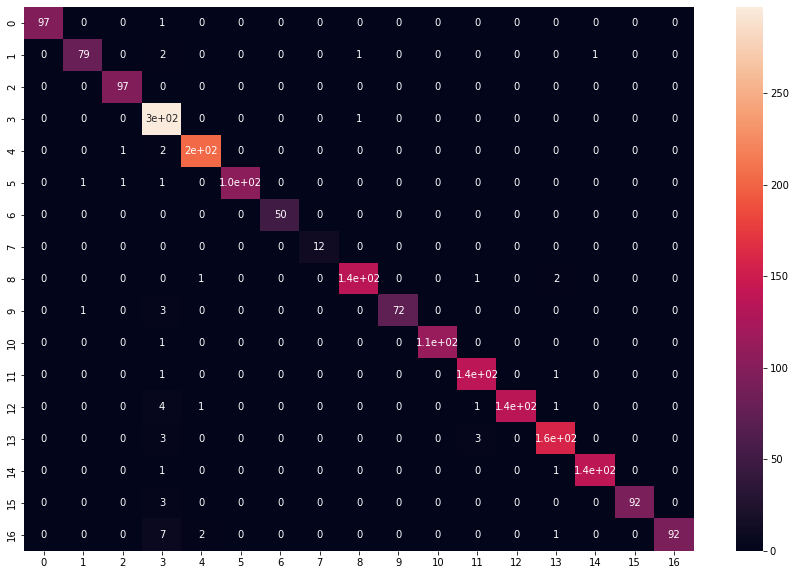

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

Predicting with some more data

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [ ]:
predict("என் பெயர்")

The langauge is in Tamil


In [ ]:
predict("come va")

The langauge is in Italian


In [ ]:
predict("mi piace codificare")

The langauge is in Italian
